In [2]:
import requests
import pandas as pd

import numpy as np # library to handle data in a vectorized manner
import requests

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


<h2>Reading in data scraped in from  the table in https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M in csv format </h2>

<h2>Importing data from provisioned link to a csv file containing geographical coordinates of each postal code</h2>

In [4]:
fr_df=pd.read_excel(r"F:\GitHub\DS_CAPTSONE_Coursera\FR_postal_codes.xlsx")
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20413 entries, 0 to 20412
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  20413 non-null  object 
 1   Place Name   20413 non-null  object 
 2   State        20412 non-null  object 
 3   County       20311 non-null  object 
 4   City         20010 non-null  object 
 5   Latitude     20413 non-null  float64
 6   Longitude    20413 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [5]:
fr_df.rename(columns={"Place Name": "placename"},inplace='True')
fr_df.rename(columns={"Postal Code": "Pcode"},inplace='True')

In [6]:
fr_df['City'].describe()

count     20010
unique      330
top       Paris
freq        845
Name: City, dtype: object

In [7]:
# fr_df[fr_df['City']=='Paris']
notparis_df=fr_df[fr_df['City']!='Paris']
paris_df=fr_df[fr_df['City']=='Paris']
notparis_df.head()

,Pcode,placename,State,County,City,Latitude,Longitude
0,24000,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
1,24001 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
2,24002 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
3,24003 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
4,24004 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167


In [8]:
# paris_df.rename(columns={"Place Name": "placename"},inplace='True')
# paris_df.rename(columns={"Postal Code": "Pcode"},inplace='True')
# # paris_df['placename'].describe()
# fr_df.rename(columns={"Place Name": "placename"},inplace='True')
# fr_df.rename(columns={"Postal Code": "Pcode"},inplace='True')

In [21]:
frcity_df=fr_df.drop(columns=['County','State'])

<h2>Using geopy library to get the latitude and longitude values of Paris</h2>

In [22]:
address = 'France'
geolocator = Nominatim(user_agent="FR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of France are 46.603354, 1.8883335.


In [24]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(frcity_df['Latitude'], frcity_df['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

KeyboardInterrupt: 

### simplifying the above map to segment and cluster only the neighborhoods in Downtown Toronto.
#### Slicing the original dataframe and create a new dataframe of the Downtown Toronto data.

In [11]:
paris15_data = paris_df[paris_df['placename'] != 'Paris 15 Vaugirard'].reset_index(drop=True)
paris15_data.head()

,Pcode,placename,State,County,City,Latitude,Longitude
0,75015,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003
1,75115 CEDEX 15,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003
2,75502 CEDEX 15,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003
3,75503 CEDEX 15,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003
4,75504 CEDEX 15,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003


In [12]:
address = 'Paris,FR'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are latitude: {} and longitude:{}.'.format(address,latitude, longitude))

The geograpical coordinates of Paris,FR are latitude: 48.8566969 and longitude:2.3514616.


## Visualizing Downtown Toronto the neighborhood with red markers.

In [13]:
map_DT = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(paris15_data['Latitude'], paris15_data['Longitude'], paris15_data['placename']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff1111',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DT)  
    
map_DT

## Utilizing the Foursquare API to explore the neighborhoods and segment them.

In [14]:
CLIENT_ID = 'UNQQZURMW53WEG4NIEAKFUMNBHDWO5Q4MVPLX3TR1WKZPQYK' # your Foursquare ID
CLIENT_SECRET = 'KF21BVV5MJC0IUBLOMTWSQS1XJMUUY5VDOKCKOIWDLVO0CQ3' # your Foursquare Secret
VERSION = '20190605' # Foursquare API version

print('CREDENTIALS:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CREDENTIALS:
CLIENT_ID: UNQQZURMW53WEG4NIEAKFUMNBHDWO5Q4MVPLX3TR1WKZPQYK
CLIENT_SECRET:KF21BVV5MJC0IUBLOMTWSQS1XJMUUY5VDOKCKOIWDLVO0CQ3


### Finding third neighborhhod name

In [15]:
paris15_data.loc[5, 'placename']

'Paris 15 Vaugirard'

## Finding Church and Wellesley geolocation

In [16]:
neighborhood_latitude = paris15_data.loc[5, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = paris15_data.loc[5, 'Longitude']# neighborhood longitude value

neighborhood_name =paris15_data.loc[5, 'placename'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Paris 15 Vaugirard are 48.8412, 2.3003.


#### Getting venues that are in Church and Wellesley within a radius of 500 meters.

In [17]:
radius = 500 
LIMIT = 50 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=UNQQZURMW53WEG4NIEAKFUMNBHDWO5Q4MVPLX3TR1WKZPQYK&client_secret=KF21BVV5MJC0IUBLOMTWSQS1XJMUUY5VDOKCKOIWDLVO0CQ3&v=20190605&ll=48.8412,2.3003&radius=500&limit=50'

In [18]:
results = requests.get(url).json()
# results

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(15)

,name,categories,lat,lng
0,Hôtel Eiffel Blomet,Hotel,48.841641,2.302398
1,Wallace,French Restaurant,48.842034,2.303153
2,Square Saint-Lambert,Park,48.842343,2.297108
3,Les Artisans,French Restaurant,48.842763,2.303224
4,Je thé...me,French Restaurant,48.838866,2.300375
5,Boulangerie Pichard,Bakery,48.842259,2.302749
6,Odette & Charlus Café,Bar,48.840481,2.304230
7,Arti,Indian Restaurant,48.841016,2.297283
8,Matsuyama,Japanese Restaurant,48.841393,2.298919
9,Intuition Gourmande,Restaurant,48.841402,2.299432


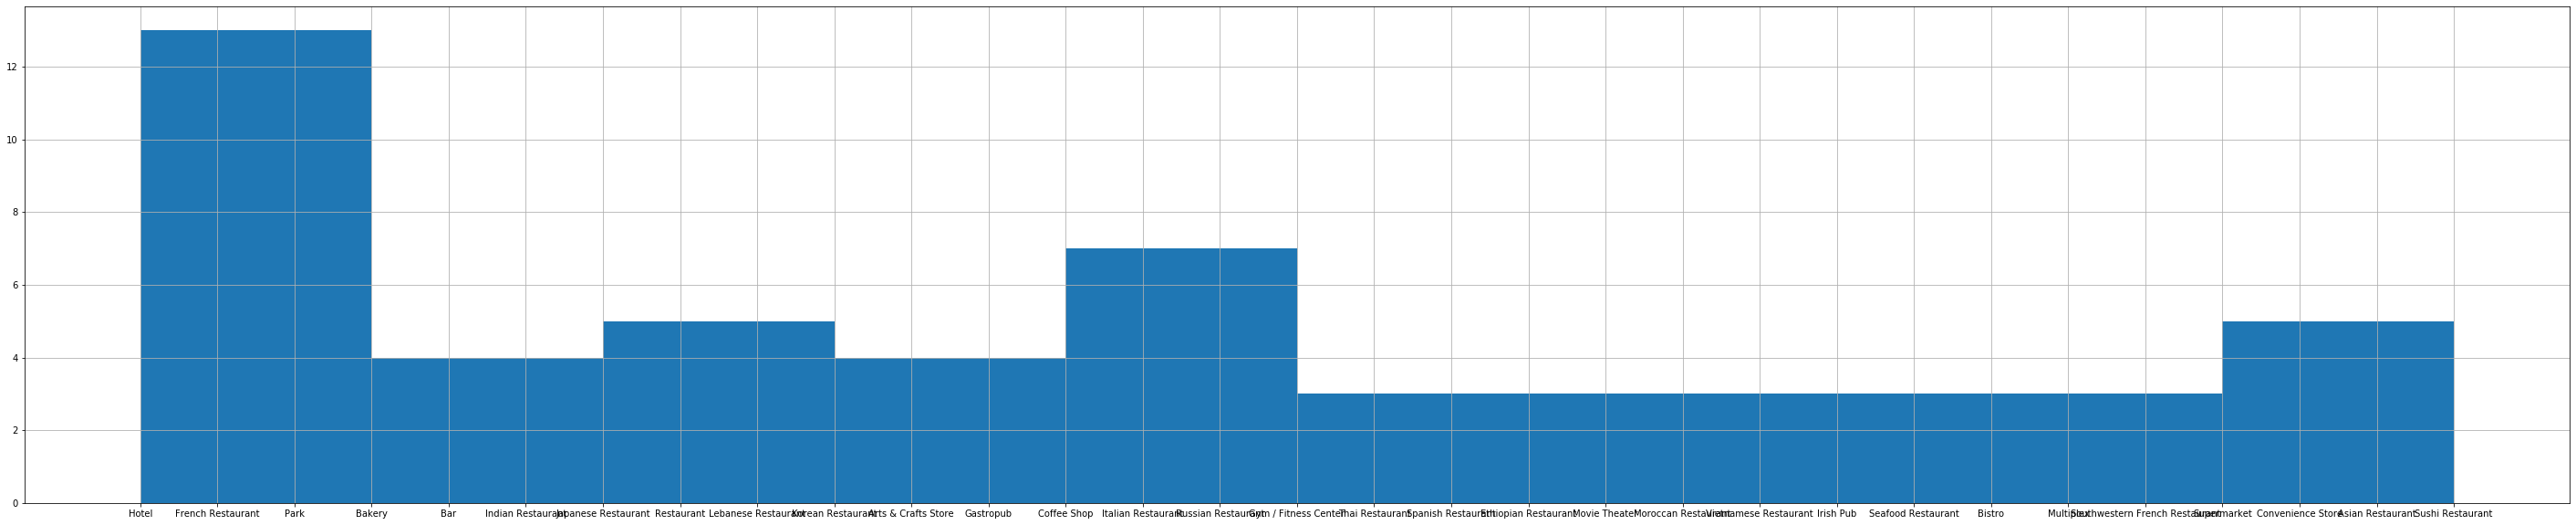

In [21]:
nearby_venues['categories'].hist(figsize = (50,10))
nearby_venues.groupby(['categories'],as_index=False).count()
mode_ven=nearby_venues['categories'].mode()

In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Downtown Toronto

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )  

NameError: name 'toronto_data' is not defined

### Venues in Toronto

In [24]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )  

NameError: name 'toronto_data' is not defined

## Dataframe with venues in Downtown Toronto

In [25]:
print(toronto_venues.shape)
toronto_venues.head()

NameError: name 'toronto_venues' is not defined

### Let's check how many venues per neighborhood

In [26]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

NameError: name 'toronto_venues' is not defined

In [27]:
toronto_venues.groupby('Neighborhood').count()

NameError: name 'toronto_venues' is not defined

#### Let's find out how many unique categories can be curated from all the returned venues

In [28]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

NameError: name 'toronto_venues' is not defined

## 3. Analyze Each Neighborhood

In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

NameError: name 'toronto_venues' is not defined

And let's examine the new dataframe size.

In [30]:
toronto_onehot.shape

NameError: name 'toronto_onehot' is not defined

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

NameError: name 'toronto_onehot' is not defined

In [32]:
toronto_grouped.shape

NameError: name 'toronto_grouped' is not defined

#### Let's print 5 neighborhoods along with the top 5 most common venues

In [33]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood'].head():
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

NameError: name 'toronto_grouped' is not defined

#### Let's put that into a *pandas* dataframe

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

NameError: name 'toronto_grouped' is not defined

## Clustering Neighborhoods

In [36]:
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

NameError: name 'toronto_grouped' is not defined

## new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

TypeError: 'tuple' object is not callable

In [37]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

NameError: name 'toronto_data' is not defined

## visualizing the resulting clusters

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'toronto_merged' is not defined

## CLUSTER 1

In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 2

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 3

In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 4

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

## CLUSTER 5

In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined

In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

NameError: name 'toronto_merged' is not defined